### Rainfall Prediction - Weather Forecasting
Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [144]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option
display(df.head())

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [37]:
df.shape

(8425, 23)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [40]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

In [42]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'Month', 'my_dates',
       'Weekday'],
      dtype='object')

In [145]:
for i in df.columns:
    df[i] = df[i].replace(' ',np.nan,regex = True)

In [146]:
[i for i in df.columns if df[i].isnull().sum()>0]

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [147]:
Missing_Data = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

In [148]:
for i in Missing_Data:
    df[i] = df[i].fillna(df[i].dropna().mode()[0])

In [149]:
[i for i in df.columns if df[i].isnull().sum()>0]

[]

In [150]:
import calendar
df["year"] = df['Date'].str.split('-').str[2].astype(int)
df['Month'] = df['Date'].str.split('-').str[1].astype(int)
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df['my_dates'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['my_dates'].dt.day_name()

In [151]:
df1 = df.drop(['Date','my_dates'],axis=1)

In [152]:
df1.select_dtypes(exclude=['int']).columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Weekday'],
      dtype='object')

In [153]:
features = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday',  'Month', 'Weekday' ]

In [154]:
for i in features:
    print(i,df1[i].nunique())

Location 12
MinTemp 285
MaxTemp 331
Rainfall 250
Evaporation 116
Sunshine 140
WindGustDir 16
WindGustSpeed 52
WindDir9am 16
WindDir3pm 16
WindSpeed9am 34
WindSpeed3pm 35
Humidity9am 90
Humidity3pm 94
Pressure9am 384
Pressure3pm 374
Cloud9am 9
Cloud3pm 9
Temp9am 304
Temp3pm 328
RainToday 2
Month 12
Weekday 7


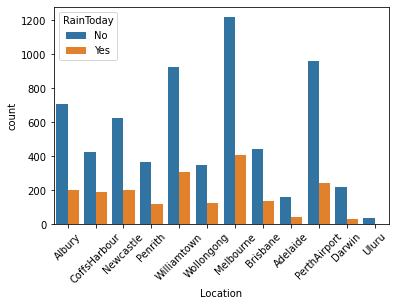

In [155]:
sns.countplot(x='Location',hue='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

In [157]:
sns.violinplot(x='MinTemp',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

In [159]:
sns.violinplot(x='MaxTemp',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

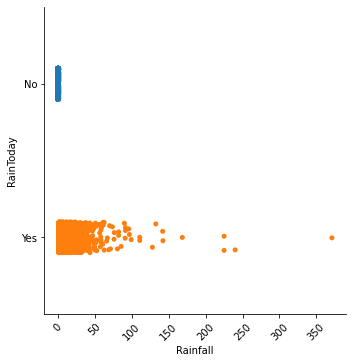

In [160]:
sns.catplot(x='Rainfall',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

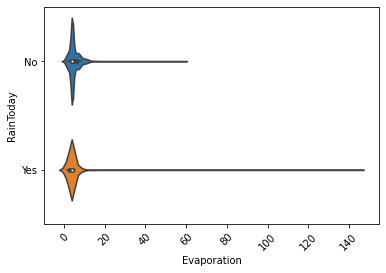

In [161]:
sns.violinplot(x='Evaporation',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

In [163]:
sns.violinplot(x='Sunshine',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

In [164]:
sns.countplot(x='WindGustDir',hue='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

In [165]:
sns.countplot(x='WindDir9am',hue='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

In [166]:
sns.countplot(x='WindDir3pm',hue='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

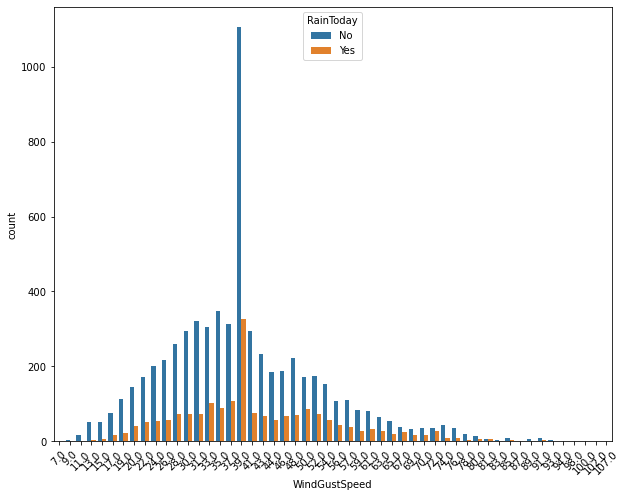

In [167]:
plt.figure(figsize=(10,8))
sns.countplot(x='WindGustSpeed',hue='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

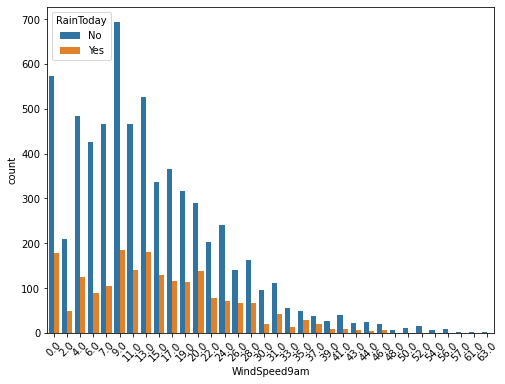

In [168]:
plt.figure(figsize=(8,6))
sns.countplot(x='WindSpeed9am',hue='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

In [169]:
plt.figure(figsize=(8,6))
sns.countplot(x='WindSpeed3pm',hue='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

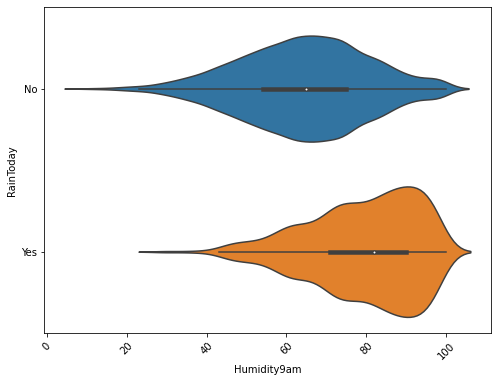

In [170]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Humidity9am',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

In [171]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Humidity3pm',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

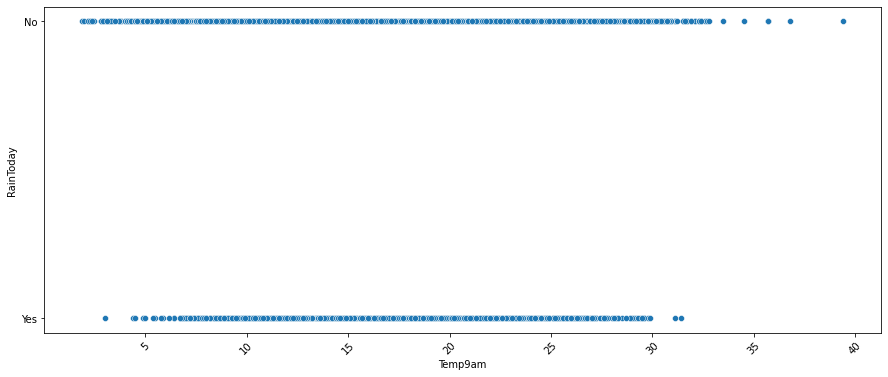

In [172]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Temp9am',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

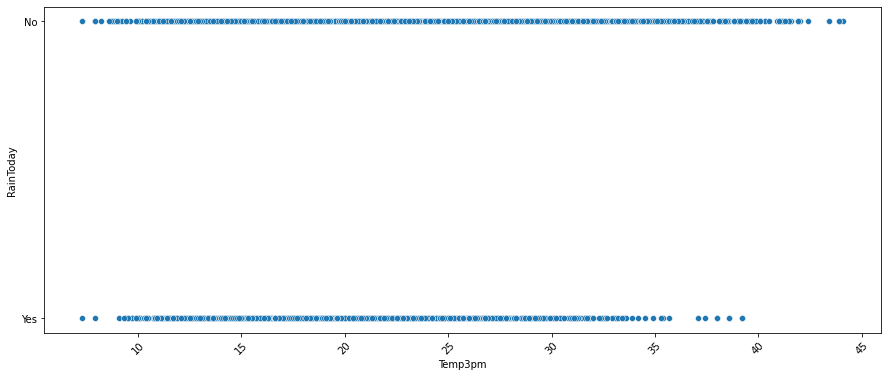

In [173]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Temp3pm',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

In [174]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Cloud9am',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

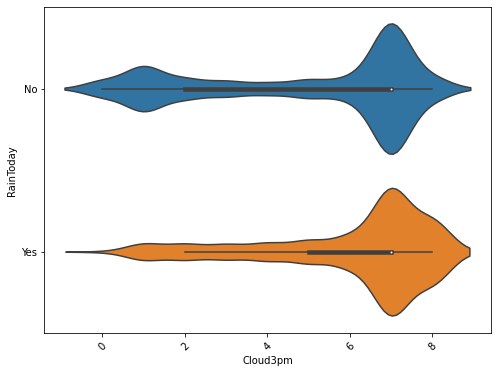

In [175]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Cloud3pm',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

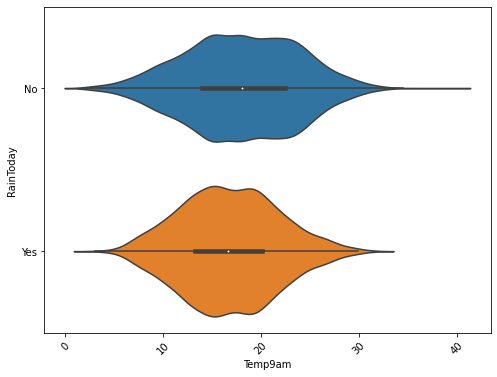

In [176]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Temp9am',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

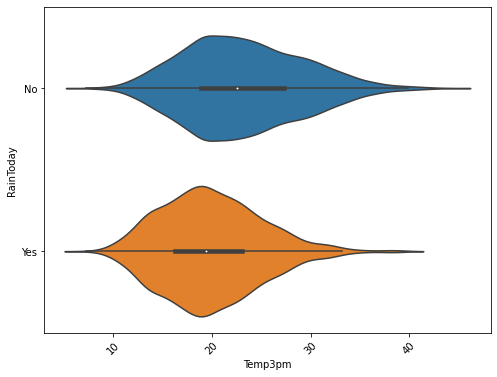

In [177]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Temp3pm',y='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

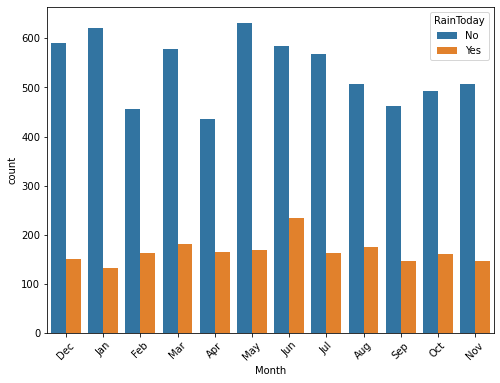

In [178]:
plt.figure(figsize=(8,6))
sns.countplot(x='Month',hue='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

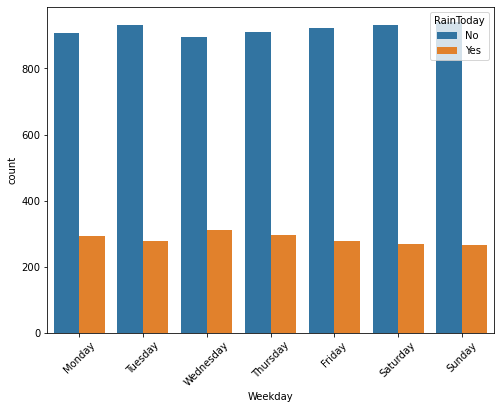

In [179]:
plt.figure(figsize=(8,6))
sns.countplot(x='Weekday',hue='RainToday',data=df1)
plt.xticks(rotation = 45)
plt.show()

In [180]:
category = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Weekday']
lab = LabelEncoder()
for i in category:
    df1[i] = lab.fit_transform(df1[i])

print(df1.dtypes)

Location         int32
MinTemp          int64
MaxTemp          int64
Rainfall         int64
Evaporation      int64
Sunshine         int64
WindGustDir      int32
WindGustSpeed    int64
WindDir9am       int32
WindDir3pm       int32
WindSpeed9am     int64
WindSpeed3pm     int64
Humidity9am      int64
Humidity3pm      int64
Pressure9am      int64
Pressure3pm      int64
Cloud9am         int64
Cloud3pm         int64
Temp9am          int64
Temp3pm          int64
RainToday        int32
RainTomorrow     int32
year             int32
Month            int32
Weekday          int32
dtype: object


In [181]:
for i in df1.columns :
    if df1.skew().loc[i]>0.60:
        df1[i] = np.log1p(df1[i])

In [182]:
df1.skew()

Location        -0.050456
MinTemp         -0.087856
MaxTemp          0.373751
Rainfall         1.256360
Evaporation     -0.886093
Sunshine         0.127742
WindGustDir      0.119640
WindGustSpeed   -0.782457
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am    -0.853651
WindSpeed3pm     0.491803
Humidity9am     -0.261585
Humidity3pm      0.110858
Pressure9am      0.211718
Pressure3pm     -0.138037
Cloud9am        -0.863322
Cloud3pm        -0.804407
Temp9am         -0.016518
Temp3pm          0.394494
RainToday        1.242362
RainTomorrow     1.241588
year             0.004260
Month           -0.019653
Weekday         -0.003205
dtype: float64

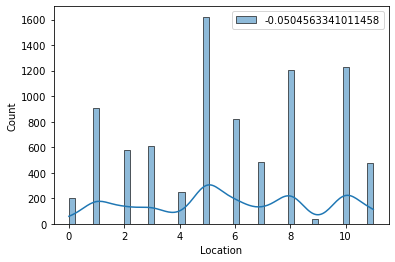

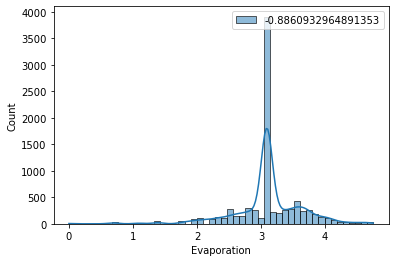

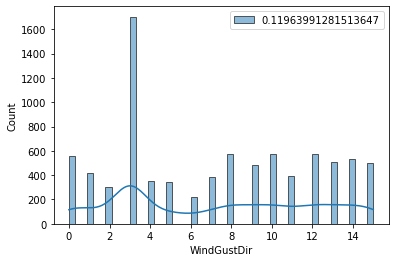

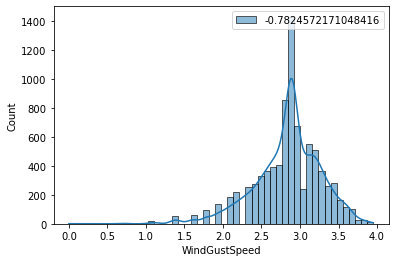

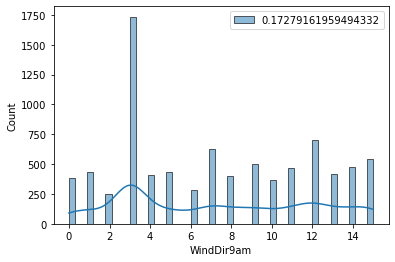

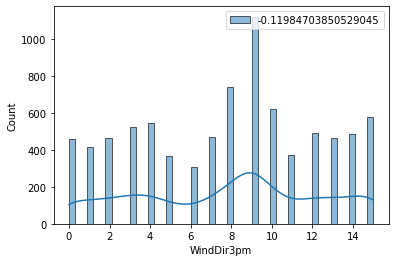

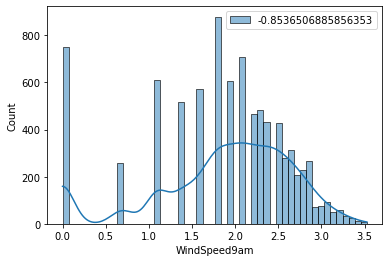

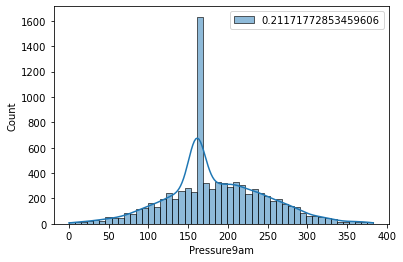

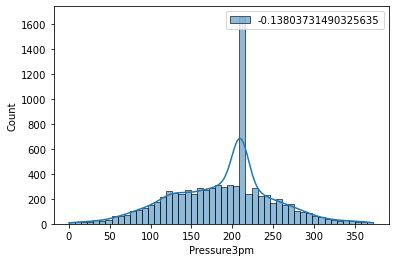

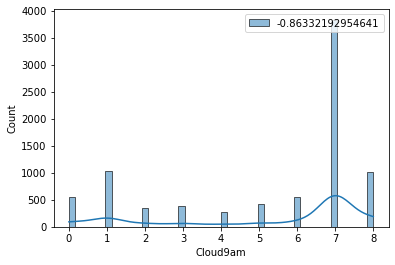

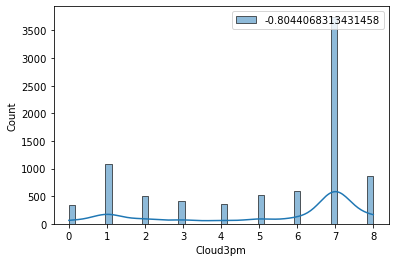

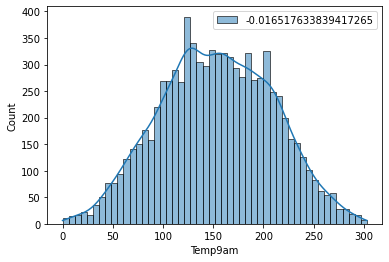

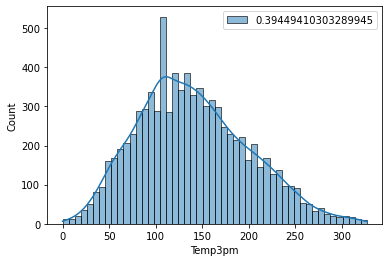

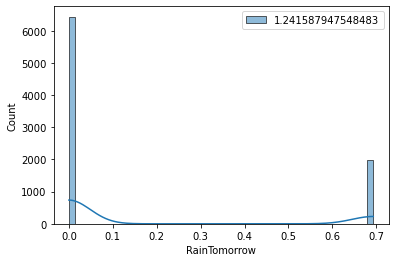

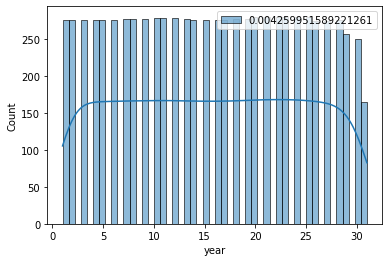

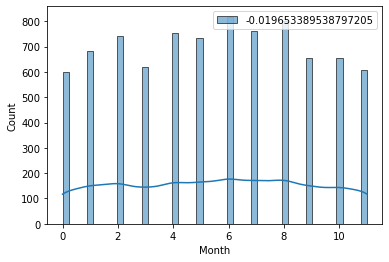

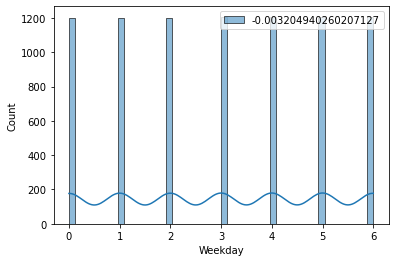

In [183]:
for i in df1.columns:
    sns.histplot(df1[i], kde = True, bins = 50, label = df1[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [184]:
z = np.abs(zscore(df1))
print(z)

      Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0     1.515776  0.040666  0.150662  0.467380     0.045711  0.975328   
1     1.515776  1.075759  0.209710  0.637227     0.045711  0.975328   
2     1.515776  0.052369  0.307993  0.637227     0.045711  0.975328   
3     1.515776  0.740832  0.684745  0.637227     0.045711  0.975328   
4     1.515776  0.803557  1.389108  0.717347     0.045711  0.975328   
5     1.515776  0.263951  0.963214  0.040060     0.045711  0.975328   
6     1.515776  0.208130  0.193329  0.637227     0.045711  0.975328   
7     1.515776  1.019938  0.471798  0.637227     0.045711  0.975328   
8     1.515776  0.647796  1.323586  0.637227     0.045711  0.975328   
9     1.515776  0.015155  1.028736  0.841059     0.045711  0.975328   
10    1.515776  0.040666  1.077878  0.637227     0.045711  0.975328   
11    1.515776  0.505843  0.347228  1.144667     0.045711  0.975328   
12    1.515776  0.505843  0.855025  2.143687     0.045711  0.975328   
13    

In [185]:
threshold = 3
print(np.where(z<3))
print(df1.shape)

(array([   0,    0,    0, ..., 8424, 8424, 8424], dtype=int64), array([ 0,  1,  2, ..., 22, 23, 24], dtype=int64))
(8425, 25)


In [186]:
df_new = df1[(z<3).all(axis = 1)]

In [187]:
df_new.shape

(8117, 25)

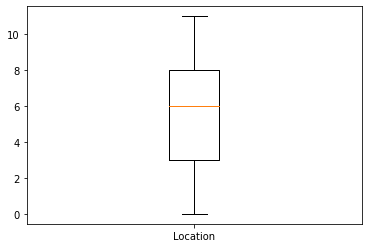

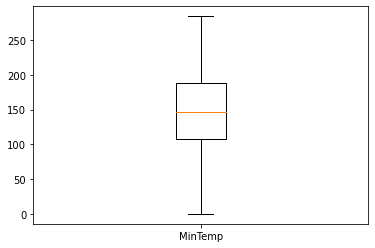

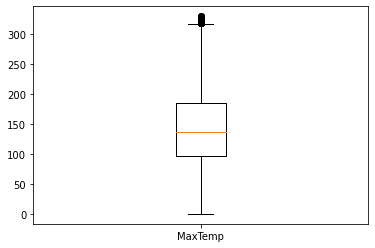

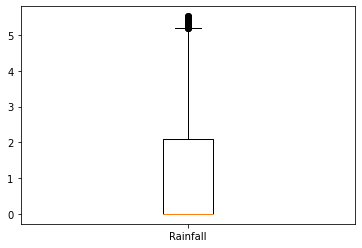

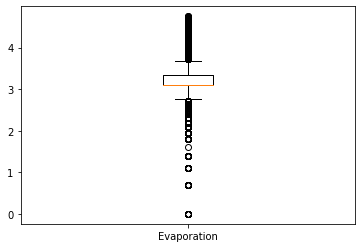

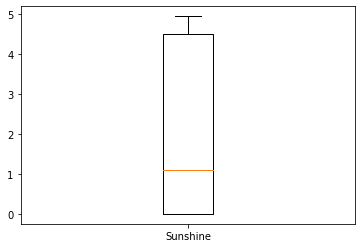

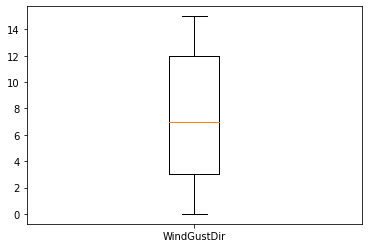

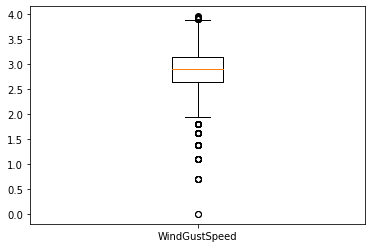

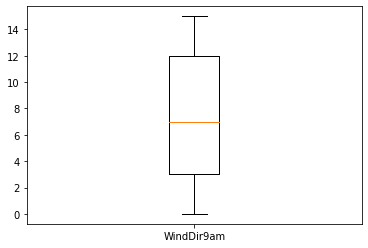

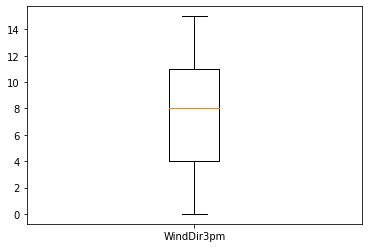

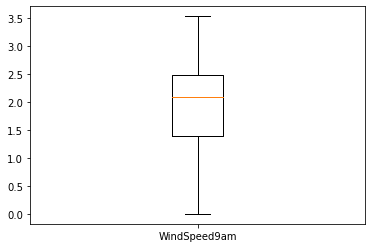

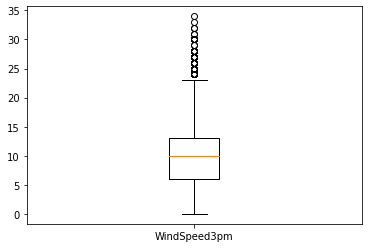

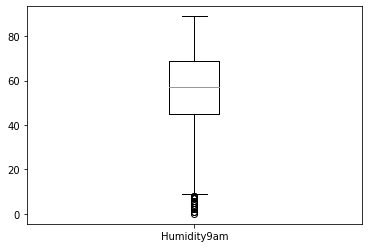

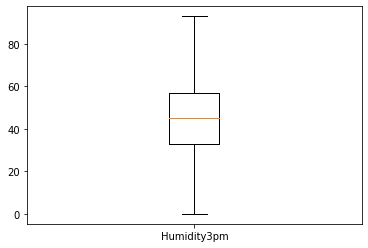

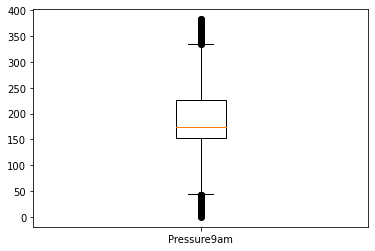

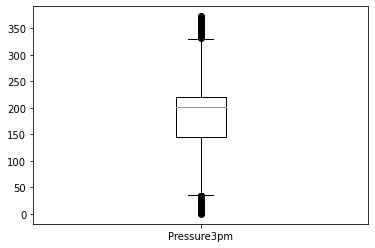

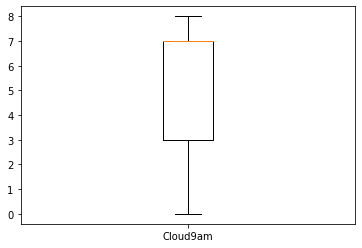

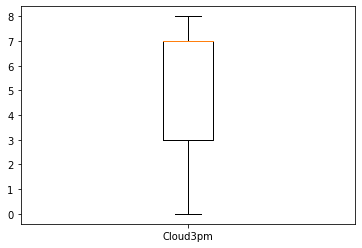

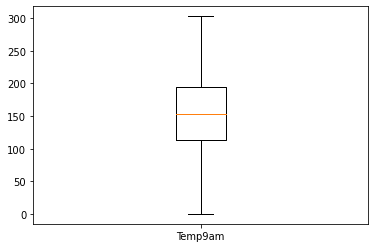

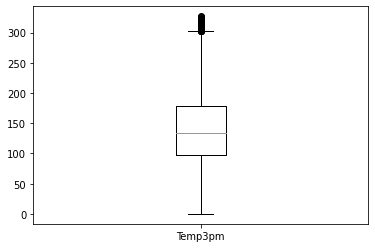

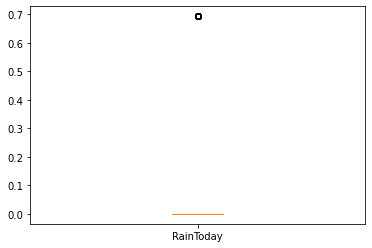

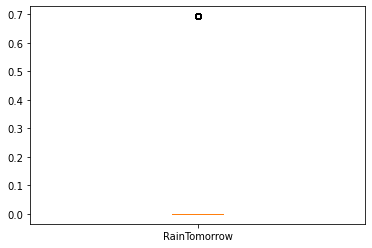

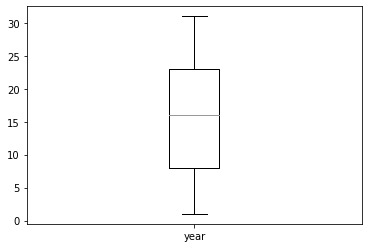

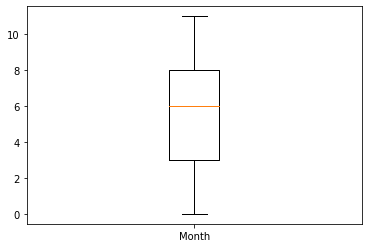

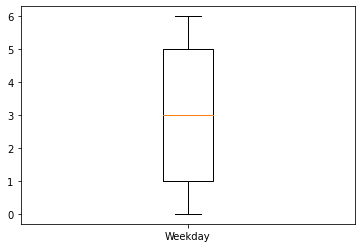

In [188]:
for i in df1.columns:
    plt.boxplot(df1[i], labels = [i])
    plt.show()

In [225]:
df1['RainTomorrow'] = lab.fit_transform(df1['RainTomorrow'])

In [226]:
X = df1.drop(['RainTomorrow'],axis=1)
y = df1['RainTomorrow']

In [227]:
df1['RainTomorrow'].unique()

array([0, 1], dtype=int64)

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [230]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)

In [231]:
ROS.fit(X,y)

RandomOverSampler(random_state=42)

In [232]:
X_ros, Y_ros= ROS.fit_resample(X, y)

In [233]:
Y_ros.value_counts(normalize=True)

0    0.5
1    0.5
Name: RainTomorrow, dtype: float64

In [234]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.360290606791574
R2 score for the random state is 42 is 0.47444333870408295
R2 score for the random state is 42 is 0.32276408088283803
R2 score for the random state is 42 is 0.6872920276104831
R2 score for the random state is 42 is 0.5344795533921842
R2 score for the random state is 42 is 0.8736025898578225
R2 score for the random state is 42 is 0.8291289229436515
R2 score for the random state is 43 is 0.3488827482988244
R2 score for the random state is 43 is 0.45967350649864125
R2 score for the random state is 43 is 0.3206542606827336
R2 score for the random state is 43 is 0.6778508217446271
R2 score for the random state is 43 is 0.5075073790671368
R2 score for the random state is 43 is 0.8635707649655111
R2 score for the random state is 43 is 0.8126213652937654
R2 score for the random state is 44 is 0.34299719022469755
R2 score for the random state is 44 is 0.4662303167972165
R2 score for the random state is 44 is 0.3115595917226829
R2 score fo

In [235]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [236]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [237]:
ETR=ExtraTreesRegressor()
RandomizedSearch_ETR=RandomizedSearchCV(estimator=ETR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=70,n_jobs=-1)
RandomizedSearch_ETR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=70, verbose=2)

In [140]:
RandomizedSearch_ETR.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 340}

In [141]:
RandomizedSearch_ETR.best_estimator_

ExtraTreesRegressor(max_depth=340, max_features='auto', n_estimators=300)

In [142]:
ETR = ExtraTreesRegressor(n_estimators=300,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=560,random_state=68)
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 77.32959665021296


In [238]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.11863433011537557
Mean squared Error:  0.04109399576171416
Root Mean Absolute Error:  0.3444333464044612


Text(0, 0.5, 'Predicted_Y')

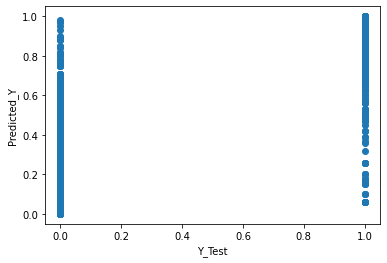

In [239]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [240]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [241]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.923239934071109
accuracy score correspond to random state  40 is 0.8309394866964916
accuracy score correspond to random state  41 is 0.9161761243230515
accuracy score correspond to random state  41 is 0.8269366611725925
accuracy score correspond to random state  42 is 0.9185307275724041
accuracy score correspond to random state  42 is 0.8372969154697434
accuracy score correspond to random state  43 is 0.9199434895220155
accuracy score correspond to random state  43 is 0.8217565340240169
accuracy score correspond to random state  44 is 0.9084059336001884
accuracy score correspond to random state  44 is 0.8191664704497292
accuracy score correspond to random state  45 is 0.926065457970332
accuracy score correspond to random state  45 is 0.8217565340240169
accuracy score correspond to random state  46 is 0.9161761243230515
accuracy score correspond to random state  46 is 0.8262302801977867
accuracy score correspond to random state  47 is 0

In [242]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [243]:
dec = DecisionTreeClassifier(random_state=59)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [244]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=59), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [245]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=59)

In [246]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [247]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=20, min_samples_leaf=5, random_state=59)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 86.55521544619732


In [248]:
pred_prob = DTC.predict_proba(X_test)[:,1]

In [249]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

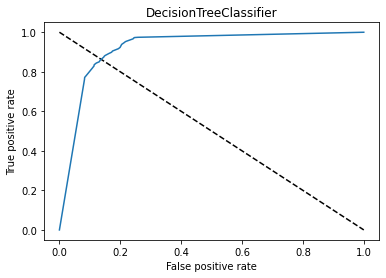

In [250]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [251]:
confusion_matrix(y_test, predc)

array([[1801,  331],
       [ 240, 1875]], dtype=int64)

[Text(0.6482324600219727, 0.9761904761904762, 'X[13] <= 0.448\nentropy = 1.0\nsamples = 8621\nvalue = [4302, 4319]'),
 Text(0.4112415313720703, 0.9285714285714286, 'X[5] <= 1.152\nentropy = 0.907\nsamples = 5012\nvalue = [3398, 1614]'),
 Text(0.3019752502441406, 0.8809523809523809, 'X[7] <= 0.419\nentropy = 0.957\nsamples = 3974\nvalue = [2468, 1506]'),
 Text(0.20185089111328125, 0.8333333333333334, 'X[15] <= 0.483\nentropy = 0.854\nsamples = 2580\nvalue = [1861, 719]'),
 Text(0.12356785365513392, 0.7857142857142857, 'X[13] <= -0.426\nentropy = 0.924\nsamples = 1862\nvalue = [1230, 632]'),
 Text(0.03895786830357143, 0.7380952380952381, 'X[13] <= -1.627\nentropy = 0.72\nsamples = 693\nvalue = [555, 138]'),
 Text(0.03672572544642857, 0.6904761904761905, 'entropy = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.04119001116071429, 0.6904761904761905, 'X[8] <= 0.923\nentropy = 0.773\nsamples = 608\nvalue = [470, 138]'),
 Text(0.02783203125, 0.6428571428571429, 'X[4] <= -0.713\nentropy = 0.83

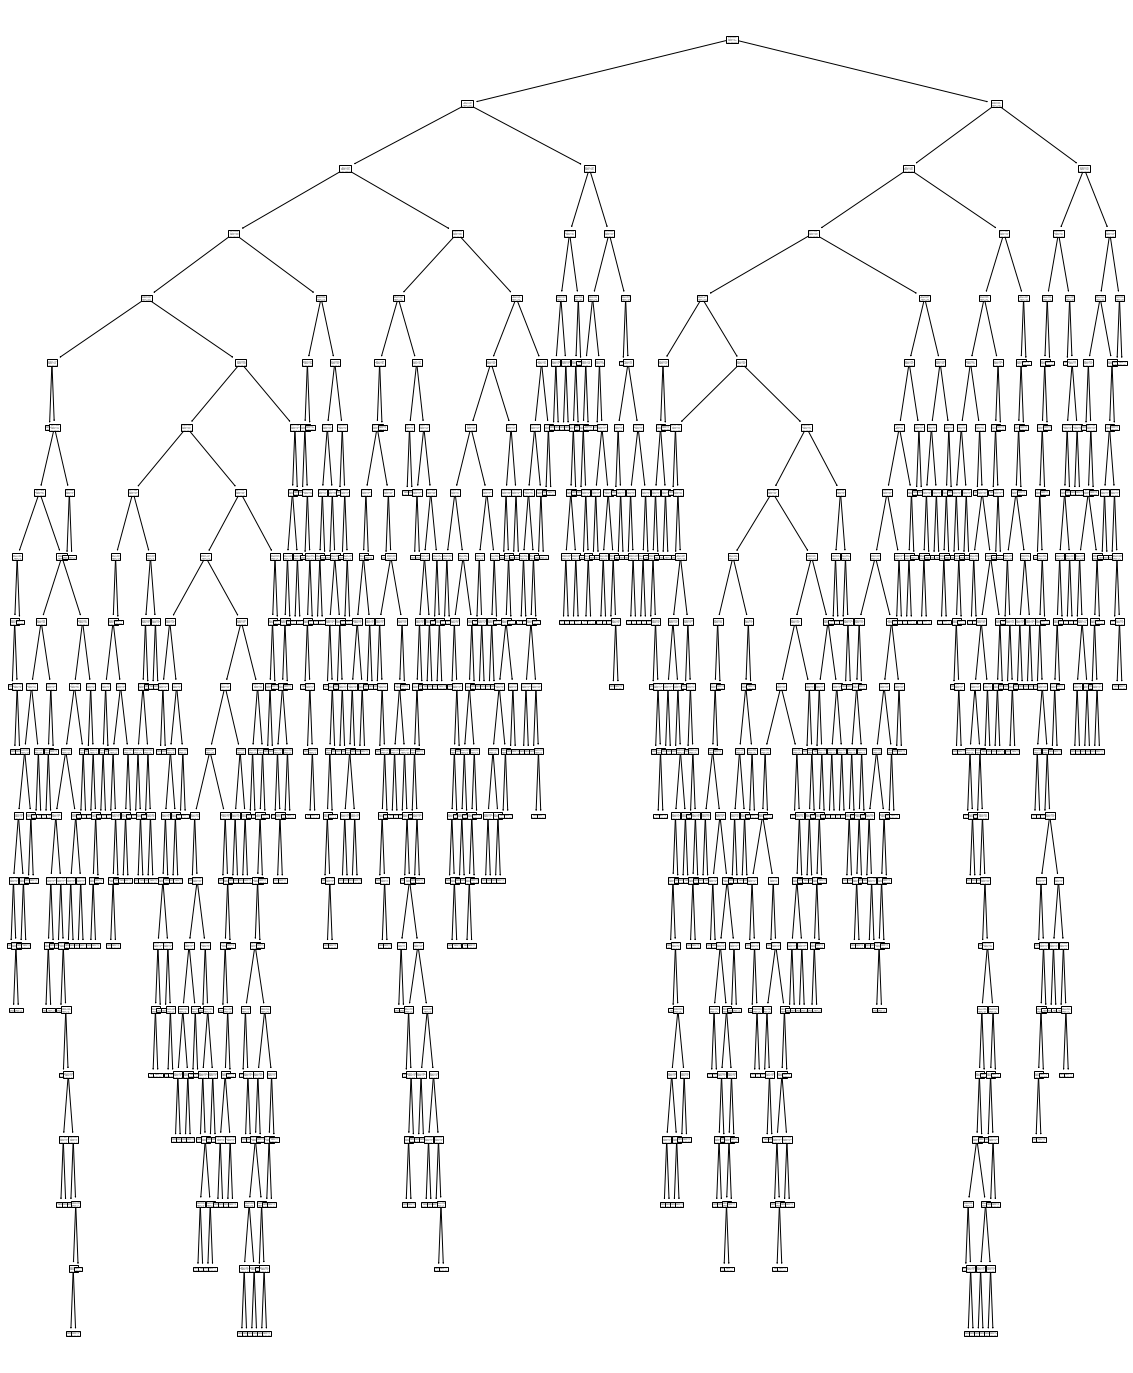

In [252]:
from sklearn import tree
g = plt.figure()
g.set_figwidth(20)
g.set_figheight(25)
tree.plot_tree(DTC)

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros, test_size = 0.3, random_state = 12345)

In [254]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9007, 24), (3861, 24), (9007,), (3861,))

In [255]:
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [256]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, log_reg.predict(X_test))
accuracy

0.7637917637917638

In [258]:
from sklearn.model_selection import RepeatedStratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros, test_size = 0.3,random_state=12345)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [259]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [260]:
grid_result.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [261]:
LR = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'liblinear')
LR.fit(X_train,y_train)
predc = LR.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 76.32737632737633
